# HW 8 - Patryk Słowkiewicz

In [213]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.dates as md
import os
import datetime as dt
import time

Wizualizacja pochodzi ze strony: https://oko.press/w-polsce-skok-zakazen-za-wczesnie-poluzowalismy-swiat-koniec-mrzonek-o-odpornosci-zbiorowej-wykresy-mapy/

![](Twdhw8.png)

# Wykres Poprawiony

Powyższy wykres sprawia tym więcej wątpliwości im dłużej na niego patrzymy.  Pierwszym pomysłem analizy tego wykresu było, że pokazuję on sumę wszystkich przypadków dla każdego dnia. Ale w takim przypadku wykres powinien być rosnący a taki nie jest. A zatem każdy z słupków jest połączoną wartością zgonów, wyzdrowień i zachorowanych ale taka prezentacja wprowadza w błąd ponieważ liczba dzinnych wyzdrowień zsumowana z liczbą zakażeń nie pokazuje faktycznego wzrostu a jest jedynie duplikacją danych co wpływa na znaczny wzrost tendencji. 

In [214]:
dfx = pd.read_csv("Covid19.csv")
df = pd.DataFrame(dfx)
#df = df.convert_dtypes(convert_integer=True)

In [215]:
df.columns = df.iloc[0]
df = df[1:]

In [216]:
df1 = df[['Data','Suma potwierdzonych przypadków', 'Suma zgonów', 'Suma wyzdrowień']]
#df2 = df[['Data', 'Nowe przypadki', 'Nowe zgony', 'Nowe wyzdrowienia']]
df11 = df1[['Suma potwierdzonych przypadków', 'Suma zgonów', 'Suma wyzdrowień']].apply(pd.to_numeric)
df11 = df11.groupby(np.arange(len(df11))//7).mean().round()
time = df[['Data']].iloc[::7, :]
#time = time.to_string()
time = time['Data'].apply(str)


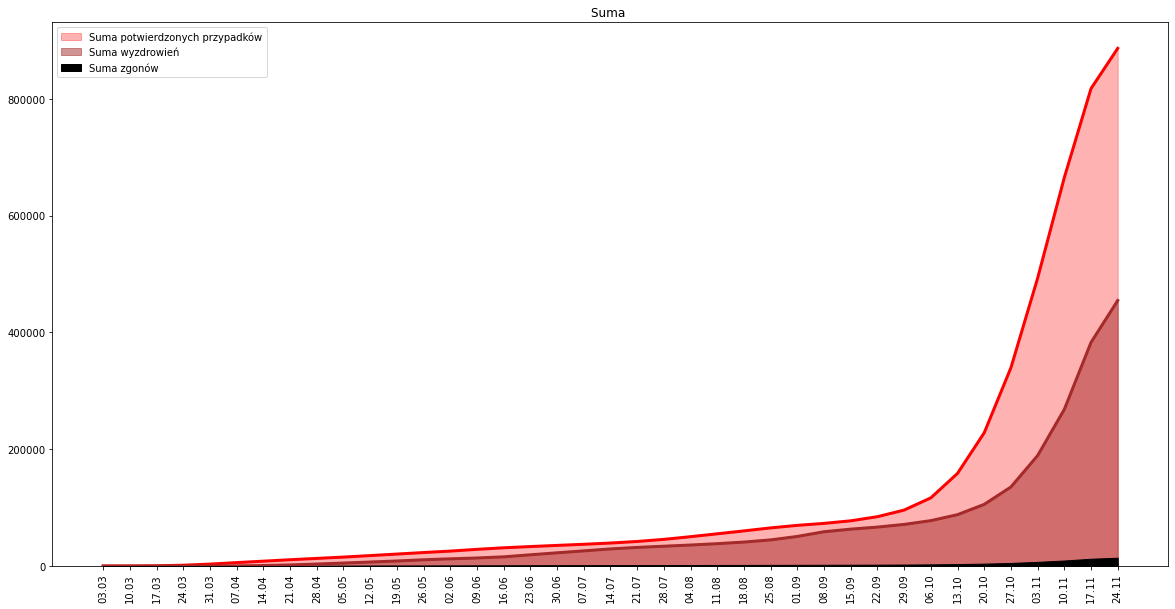

In [231]:
fig = plt.figure(figsize=(20,10))
x = df1['Data']
a = array(range(39))
plt.xticks(a, time, color='black', size=10, rotation =90)
plt.title('Suma ')
plt.stackplot(a, df11['Suma potwierdzonych przypadków'], alpha=0.3, color = 'red', labels = ['Suma potwierdzonych przypadków'])
plt.stackplot(a,df11['Suma wyzdrowień'], alpha=0.5, color = 'brown', labels = ['Suma wyzdrowień'])
plt.plot(a, df11['Suma potwierdzonych przypadków'], color = 'red',linewidth=3)
plt.plot(a,df11['Suma wyzdrowień'], color = 'brown',linewidth=3)
plt.stackplot(a,df11['Suma zgonów'], alpha=1, color = 'black', labels = ['Suma zgonów'])
plt.legend()

# Uzasadnienie

Ja skorzystałem ze zbioru danych Michała Rogalskiego https://docs.google.com/spreadsheets/d/1ierEhD6gcq51HAm433knjnVwey4ZE5DCnu1bW7PRG3E/htmlview. Aby wykres sprawiał mniej wątpliwości użyłem półprzeźroczystych stackplotów. Dzięki temu jesteśmy w stanie lepiej ocenić faktyczne wzrosty oraz różnicę między poszczególnymi wartościami dla jednego dnia.